In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer

## Read Data From File

In [2]:
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

In [3]:
data.head()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
mojombo,1,79,0,1970379,0,0,0,0,2566242,928419,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2,1,0,4609687,0,0,0,0,0,470103,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,4,358,0,3378185,0,0,0,0,2687760,952,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,19,3481,0,11661,0,0,0,0,0,951748,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,20,18,0,0,0,0,0,0,0,43311,...,0,0,0,0,0,0,0,0,0,8688


In [4]:
data.describe()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,566.000000,566.000000,566.0,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,...,5.660000e+02,5.660000e+02,5.660000e+02,566.000000,5.660000e+02,5.660000e+02,566.000000,566.000000,5.660000e+02,5.660000e+02
mean,1028.015901,806.655477,0.0,5.297650e+05,4.045185e+05,2.021002e+05,1.243830e+06,2.465007e+04,6.265224e+05,8.096891e+05,...,8.605134e+03,1.312553e+04,2.549587e+04,89.464664,3.250359e+04,6.195692e+05,21.893993,8.621908,6.934264e+04,8.504759e+05
std,640.867207,1241.047011,0.0,2.986027e+06,2.595730e+06,2.617566e+06,2.909326e+07,4.516894e+05,8.099085e+06,8.881708e+06,...,1.723616e+05,2.793647e+05,4.323471e+05,1056.104616,2.341037e+05,8.491915e+06,376.575613,205.121700,1.649714e+06,7.398095e+06
min,1.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,456.500000,37.250000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,7.630000e+02
50%,1011.000000,368.000000,0.0,3.310000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.810000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.053500e+03,0.000000,0.000000,0.000000e+00,1.588050e+04
75%,1568.500000,1126.250000,0.0,6.119475e+04,5.679000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.972150e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.335000e+03,1.877175e+04,0.000000,0.000000,0.000000e+00,1.858868e+05
max,2173.000000,12981.000000,0.0,5.295688e+07,3.382137e+07,5.736992e+07,6.921549e+08,1.068952e+07,1.851307e+08,1.860555e+08,...,4.082184e+06,6.640060e+06,9.814544e+06,18223.000000,4.753033e+06,1.857201e+08,7540.000000,4880.000000,3.924794e+07,1.647797e+08


In [ ]:
data.mean()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, mojombo to langalex
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Username       566 non-null    int64
 1   Id             566 non-null    int64
 2   Contributions  566 non-null    int64
 3   JavaScript     566 non-null    int64
 4   Python         566 non-null    int64
 5   Java           566 non-null    int64
 6   C#             566 non-null    int64
 7   PHP            566 non-null    int64
 8   TypeScript     566 non-null    int64
 9   Ruby           566 non-null    int64
 10  C++            566 non-null    int64
 11  C              566 non-null    int64
 12  Swift          566 non-null    int64
 13  Go             566 non-null    int64
 14  Shell          566 non-null    int64
 15  Kotlin         566 non-null    int64
 16  Rust           566 non-null    int64
 17  PowerShell     566 non-null    int64
 18  Objective-C    566 non-null    int64
 19  R 

## Transform Data

#### 1. Make the bytes into percentages

In [6]:
col = ["Id", "Contributions", "JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
tcols = [x + '-T' for x in col]
def turn_to_percent(X, columns):
    X[columns] = X[columns].div(X[columns].sum(axis=1), axis=0)
    return X

# Create a FunctionTransformer using the defined function and pass the subset_columns argument
transformer = FunctionTransformer(turn_to_percent, validate=False, kw_args={'columns': col[2:]})

# Apply the transformation to your dataset
data = transformer.transform(data)
data

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
mojombo,1,79,0,0.343363,0.000000,0.0,0.0,0.000000,0.447199,0.161788,...,0.0,0.0,0.000000,0.0,0.001352,0.003039,0.0,0.0,0.0,0.041852
defunkt,2,1,0,0.718800,0.000000,0.0,0.0,0.000000,0.000000,0.073304,...,0.0,0.0,0.000000,0.0,0.000998,0.003733,0.0,0.0,0.0,0.139780
wycats,4,358,0,0.516904,0.000000,0.0,0.0,0.000000,0.411260,0.000146,...,0.0,0.0,0.000000,0.0,0.003311,0.067557,0.0,0.0,0.0,0.000468
brynary,19,3481,0,0.011735,0.000000,0.0,0.0,0.000000,0.000000,0.957798,...,0.0,0.0,0.000000,0.0,0.000000,0.018068,0.0,0.0,0.0,0.003162
kevinclark,20,18,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.227816,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JeremyGrosser,2151,335,0,0.000000,0.000321,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.002734,0.0,0.000000,0.000000,0.0,0.0,0.0,0.996628
grahambancroft,2152,172,0,0.200075,0.000000,0.0,0.0,0.564061,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.232103,0.002484,0.0,0.0,0.0,0.001278
benvinegar,2153,872,0,0.019984,0.555985,0.0,0.0,0.000000,0.411052,0.000013,...,0.0,0.0,0.000000,0.0,0.001045,0.005304,0.0,0.0,0.0,0.005647
febuiles,2161,1699,0,0.001082,0.000000,0.0,0.0,0.000000,0.537061,0.012276,...,0.0,0.0,0.000000,0.0,0.000000,0.001304,0.0,0.0,0.0,0.361654


#### 2. Standardize the data using a StandardScaler

In [7]:
scaler = StandardScaler()

data[tcols] = scaler.fit_transform(data[col])
data.head()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
mojombo,1,79,0,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,...,-0.080014,-0.100803,-0.069615,-0.091076,-0.257281,-0.313618,-0.043088,-0.04207,-0.04207,-0.535321
defunkt,2,1,0,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,...,-0.080014,-0.100803,-0.069615,-0.091076,-0.262821,-0.309016,-0.043088,-0.04207,-0.04207,-0.227268
wycats,4,358,0,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,...,-0.080014,-0.100803,-0.069615,-0.091076,-0.226625,0.114634,-0.043088,-0.04207,-0.04207,-0.665502
brynary,19,3481,0,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,...,-0.080014,-0.100803,-0.069615,-0.091076,-0.278432,-0.213861,-0.043088,-0.04207,-0.04207,-0.657028
kevinclark,20,18,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,...,-0.080014,-0.100803,-0.069615,-0.091076,-0.278432,-0.333793,-0.043088,-0.04207,-0.04207,-0.523220


#### 3. Determine Number of Clusters

In [8]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

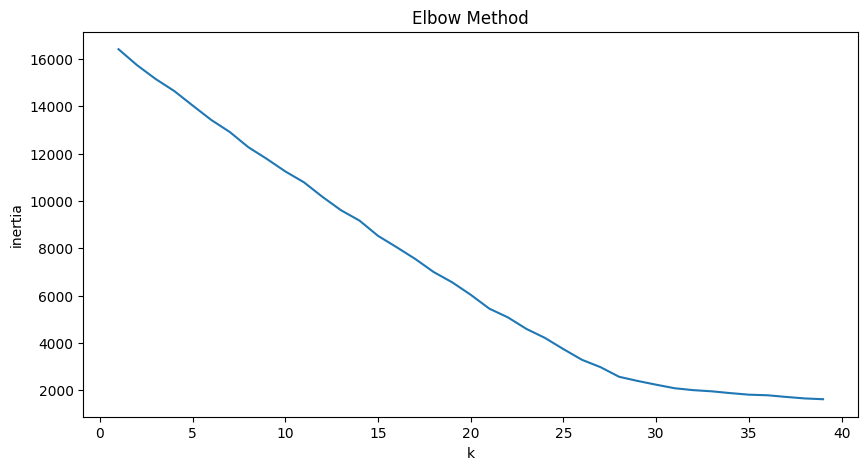

In [9]:
optimize_kmeans(data[tcols], 40)

#### 4 Apply K-Means Clustering

In [10]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
mojombo,1,79,0,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,...,-0.100803,-0.069615,-0.091076,-0.257281,-0.313618,-0.043088,-0.04207,-0.04207,-0.535321,2
defunkt,2,1,0,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,...,-0.100803,-0.069615,-0.091076,-0.262821,-0.309016,-0.043088,-0.04207,-0.04207,-0.227268,0
wycats,4,358,0,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,...,-0.100803,-0.069615,-0.091076,-0.226625,0.114634,-0.043088,-0.04207,-0.04207,-0.665502,0
brynary,19,3481,0,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,...,-0.100803,-0.069615,-0.091076,-0.278432,-0.213861,-0.043088,-0.04207,-0.04207,-0.657028,3
kevinclark,20,18,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,...,-0.100803,-0.069615,-0.091076,-0.278432,-0.333793,-0.043088,-0.04207,-0.04207,-0.523220,7


## Write K-Means Model to File

In [11]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## Write Means to File

In [13]:
mean = data.mean()
with open("../data/means.csv", "w") as f:
    for lang in col[2:]:
        f.write(str(mean[lang]) + "\n")
